<a href="https://colab.research.google.com/github/DavidGill606/Data606/blob/master/Data606/Delivery%203/DATA_606_Delivery_3_EDA_and_Implementing_ML_Algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center><font color= blue > 606 - CAPSTONE PROJECT </font></center>

##<center><font color= blue > PREDICTING SALES FOR MULTIPLE WALMART STORES </font></center>
### <center><font color= orange > ~ David Gill </font>







### <b>Importing Required Libraries/Modules for EDA - Exploratory Data Analysis

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import visuals as vs
from time import time
from IPython.display import display # Allows the use of display() for displaying DataFrames
#libraries to plot data
import matplotlib.pyplot as plt
import seaborn as sns
#libraries to implement ML
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import LinearRegression
#libraries for validating models
import sklearn as sl
import math
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

### <b>Analyzing first csv file - Store.csv


In [0]:
from google.colab import files
uploaded = files.upload()

Saving stores.csv to stores.csv


In [0]:
df_Stores = pd.read_csv('stores.csv')   #Read csv file and viewing sample data
df_Stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [0]:
df_Stores.shape   #Number of Rows and Columns

(45, 3)

In [0]:
df_Stores.dtypes    #DataType of attributes

Store     int64
Type     object
Size      int64
dtype: object

In [0]:
df_Stores_Dup = df_Stores.duplicated()    #Checking for duplicates
#print(df_Stores_Dup)

In [0]:
df_Stores_Distinct = df_Stores['Type'].unique()   #Distinct Store types
df_Stores_Distinct

array(['A', 'B', 'C'], dtype=object)

In [0]:
df_Stores_groupby = df_Stores.groupby(['Type']).count()   #Count corresponding to each store
df_Stores_groupby

,Store,Size
Type,,
A,22,22
B,17,17
C,6,6


### <b>Pie Chart respresentation for store type

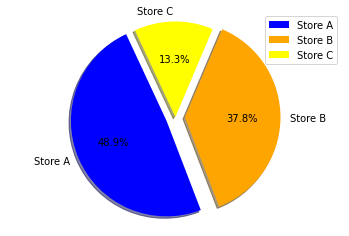

In [0]:
labels = 'Store A','Store B','Store C'
sizes = [(22/(45))*100,(17/(45))*100,(6/(45))*100]
colors = ['blue', 'orange', 'yellow']
explode = (0.1, 0.1, 0)  # separate out each pie
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=115)
plt.legend(labels, loc="best")
plt.axis('equal')
plt.show()

### <b>Box plot respresentation for store sizes

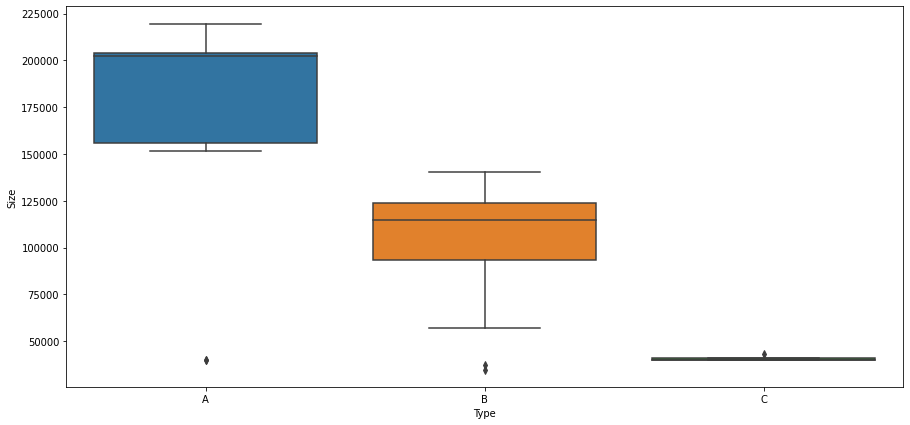

In [0]:
store_type = pd.concat([df_Stores['Type'], df_Stores['Size']], axis=1)
f, ax = plt.subplots(figsize=(15, 7))
fig = sns.boxplot(x='Type', y='Size', data=store_type)

In [0]:
#df_Stores.isnull().values.any()     #Find missing values
df_Stores.isnull().sum().sum()

0

In [0]:
NAN_count = df_Stores["Type"].isna().sum()    #Checking for NAN Values
NAN_count
NAN_count = df_Stores["Store"].isna().sum()
NAN_count
NAN_count = df_Stores["Size"].isna().sum()
NAN_count

0

### <b>EDA result for first file -

##### - It contains 45 Rows, for 45 stores 
##### - It contains 3 Columns/Attributes - <b>Store, Type, Size
##### - There are 3 distinct Store Types - <b> A, B, C, with A being the largest and C the smallest
##### - There is no overlapped area in the sizes of the stores
##### - There is no missing data in the file

### <b>Analyzing second csv file - Features.csv

In [0]:
from google.colab import files
uploaded = files.upload()

Saving features.csv to features.csv


In [0]:
df_Features = pd.read_csv('features.csv')   #Read csv file and viewing sample data
df_Features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [0]:
df_Features.shape   #Number of Rows and Columns

(8190, 12)

In [0]:
df_Features.dtypes    #DataType of attributes

Store             int64
Date             object
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
IsHoliday          bool
dtype: object

In [0]:
df_Features.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

### <b>Filling NULL Values in Features with Mean And/Or Zero(0) 

In [0]:
#Finding Mean
df_Features.loc[:,"CPI"].mean() 

172.46080918276078

In [0]:
df_Features.loc[:,"Unemployment"].mean()

7.826821038790305

In [0]:
#Fill with Zero
df_Features['MarkDown1']=df_Features['MarkDown1'].fillna(0)
df_Features['MarkDown2']=df_Features['MarkDown2'].fillna(0)
df_Features['MarkDown3']=df_Features['MarkDown3'].fillna(0)
df_Features['MarkDown4']=df_Features['MarkDown4'].fillna(0)
df_Features['MarkDown5']=df_Features['MarkDown5'].fillna(0)

In [0]:
#Fill with Mean
df_Features.fillna(df_Features.loc[:,"CPI"].mean(), inplace=True)

In [0]:
df_Features.fillna(df_Features.loc[:,"Unemployment"].mean(), inplace=True)
df_Features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,False


#### <b>Variation of Unemployment and CPI over Time

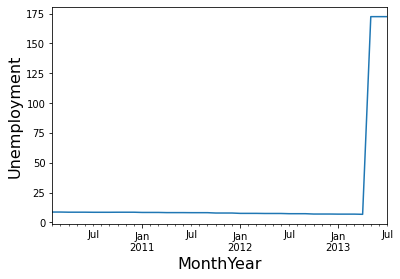

In [0]:
df_Features["MonthYear"] = pd.to_datetime(df_Features['Date']).dt.to_period('M')
df_Features_MonthYear = df_Features.groupby("MonthYear").mean()
#df_Features_MonthYear
#df_Features_MonthYear.plot(x="MonthYear", y=["Unemployment"], kind="line")
#plt.show()
df_Features['Unemployment'].groupby(df_Features['MonthYear']).mean().plot(kind = "line",rot = 0)
plt.xlabel('MonthYear', fontsize = 16)
plt.ylabel('Unemployment', fontsize = 16)
plt.show()

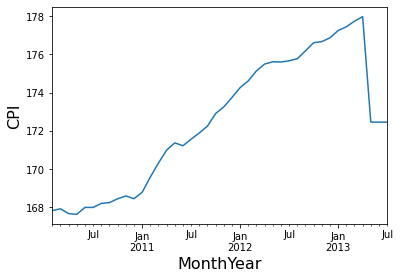

In [0]:
df_Features['CPI'].groupby(df_Features['MonthYear']).mean().plot(kind = "line",rot = 0)
plt.xlabel('MonthYear', fontsize = 16)
plt.ylabel('CPI', fontsize = 16)
plt.show()

### <b>EDA result for second file -

##### - It contains 8190 Rows
##### - It contains 12 Columns/Attributes - <b>Store, Date, Temperature,  Fuel_Price, MarkDown1, MarkDown2,	MarkDown3, MarkDown4,	MarkDown5, CPI, Unemployment, IsHoliday
##### - There are no duplicates
##### - Out if 8190 records, the below attributes have NaN Value -
#####MarkDown1 - 4158
#####MarkDown2 - 5269
#####MarkDown3 - 4577
#####MarkDown4 - 4726
#####MarkDown5 - 4140
#####CPI - 585
#####Unemployment - 585


### <b>Analyzing third csv file - Train.csv

In [0]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [0]:
df_Train = pd.read_csv('train.csv')   #Read csv file and viewing sample data
df_Train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [0]:
df_Train.shape   #Number of Rows and Columns

(421570, 5)

### <b>Plotting affect of holidays on sales

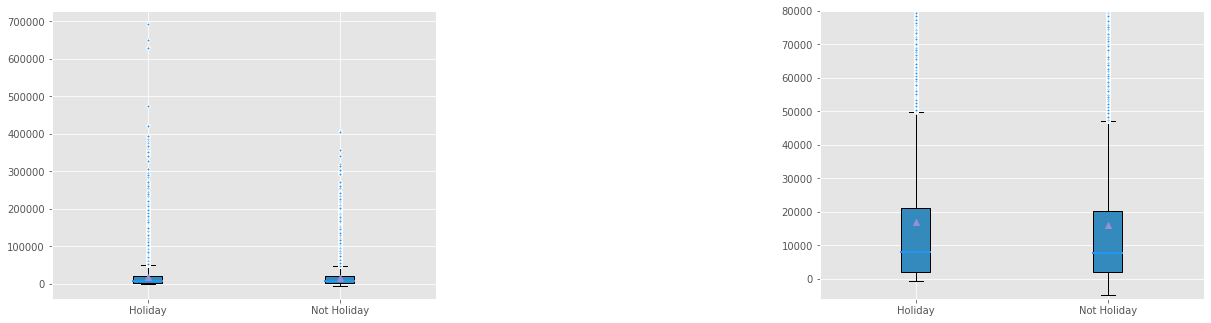

In [0]:
plt.style.use('ggplot')
fig, axes = plt.subplots(1,2, figsize = (20,5))
fig.subplots_adjust(wspace=1, hspace=1)
fig.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)
sales_holiday=df_Train[['IsHoliday','Weekly_Sales']]
target=[sales_holiday['Weekly_Sales'].loc[sales_holiday['IsHoliday']==True],sales_holiday['Weekly_Sales'].loc[sales_holiday['IsHoliday']==False]]
labels=['Holiday','Not Holiday']
#median
medianprop={'color':'#2196F3',
            'linewidth': 2,
            'linestyle':'-'}
# outliers
flierprop={'color' : '#EC407A',
          'marker' : 'o',
          'markerfacecolor': '#2196F3',
          'markeredgecolor':'white',
          'markersize' : 3,
          'linestyle' : 'None',
          'linewidth' : 0.1}
axes[0].boxplot(target,labels=labels, patch_artist = 'Patch',
                  showmeans=True,
                  flierprops=flierprop,
                  medianprops=medianprop)
axes[1].boxplot(target,labels=labels, patch_artist = 'Patch',
                  showmeans=True,
                  flierprops=flierprop,
                  medianprops=medianprop)
axes[1].set_ylim(-6000,80000)
plt.show()

###<b> Understanding Frequency of Sales for each department via a plot

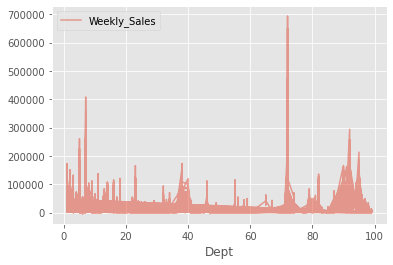

In [0]:
df_Train.plot(kind ='line', x='Dept', y='Weekly_Sales', alpha=1.5,fig=(4,5))

### <b>EDA Result on Store Sales
##### - Sales on holidays is a little bit more compared to non-holidays
##### - The Deparment with highest sales lies b/w 60 - 80

### <b>Analyzing fourth csv file - Test.csv

In [0]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv


In [0]:
df_Test = pd.read_csv('test.csv')   #Read csv file and viewing sample data
df_Test.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [0]:
df_Test.shape   #Number of Rows and Columns

(115064, 4)

### <b>EDA result for fourth file -

##### - It contains 115064 Rows
##### - It contains 4 Columns/Attributes - <b>Store, Department, Date, IsHoliday

### <b>Merging Stores, Features and Train dataframes/datasets

In [0]:
# Merging Train and Features
df_Train_Features = pd.merge(df_Features, df_Train, on=['Store','Date','IsHoliday'], how='inner')
df_Train_Features.head(2)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,MonthYear,Dept,Weekly_Sales
0,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,2010-02,1,24924.50
1,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,2010-02,2,50605.27
2,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,2010-02,3,13740.12
3,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,2010-02,4,39954.04
4,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,2010-02,5,32229.38


In [0]:
# Merging the above dataframe with Stores
df_Train_Features_Stores = pd.merge(df_Train_Features,df_Stores,how='inner',on=['Store'])
df_Train_Features_Stores.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,MonthYear,Dept,Weekly_Sales,Type,Size
0,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,2010-02,1,24924.50,A,151315
1,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,2010-02,2,50605.27,A,151315
2,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,2010-02,3,13740.12,A,151315
3,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,2010-02,4,39954.04,A,151315
4,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,2010-02,5,32229.38,A,151315


### <b>Plotting Correlation between the features

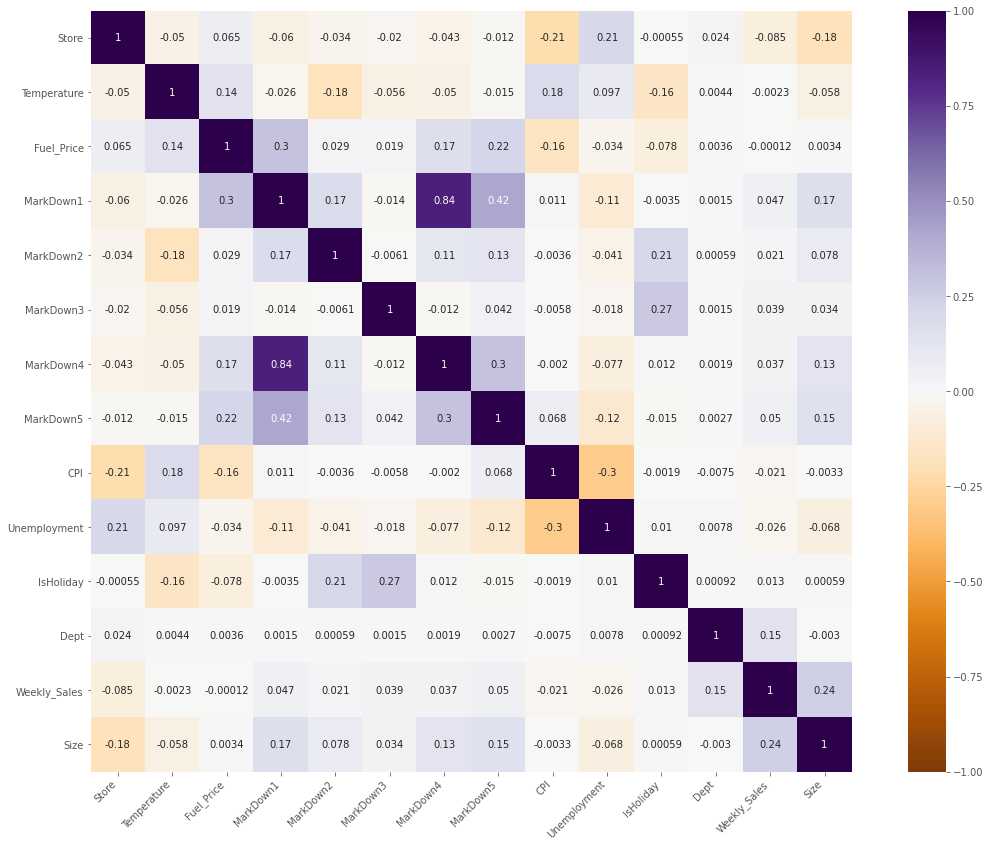

In [0]:
corr = df_Train_Features_Stores.corr()
plt.subplots(figsize=(20,14))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap='PuOr',
    square=True,
    annot =True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

###<B> Preparing Testing and Training Dataset

### Final Train Dataset

In [0]:
df_Train_Final = df_Train_Features_Stores[['Store','Size','Dept','Temperature','Fuel_Price','CPI', 'Unemployment','MarkDown1','MarkDown2',
                                           'MarkDown3','MarkDown4','MarkDown5','IsHoliday','Date','Weekly_Sales']]
#df_Train_Final.head(2)

In [0]:
#Converting Date, from string to datetime
df_Train_Final['Date'] = pd.to_datetime(df_Train_Final['Date'])

In [0]:
#Splitting Date into Days, Month and Year
df_Train_Final["day"] = df_Train_Final['Date'].map(lambda x: x.day)
df_Train_Final["month"] = df_Train_Final['Date'].map(lambda x: x.month)
df_Train_Final["year"] = df_Train_Final['Date'].map(lambda x: x.year)
df_Train_Final.head(2)

,Store,Size,Dept,Temperature,Fuel_Price,CPI,Unemployment,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,IsHoliday,Date,Weekly_Sales,day,month,year
0,1,151315,1,42.31,2.572,211.096358,8.106,0.0,0.0,0.0,0.0,0.0,False,2010-02-05,24924.50,5,2,2010
1,1,151315,2,42.31,2.572,211.096358,8.106,0.0,0.0,0.0,0.0,0.0,False,2010-02-05,50605.27,5,2,2010


In [0]:
#Dropping Date Column from the final dataframe
df_Train_Final = df_Train_Final.drop(['Date'], axis=1)
df_Train_Final.head(2)

,Store,Size,Dept,Temperature,Fuel_Price,CPI,Unemployment,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,IsHoliday,Weekly_Sales,day,month,year
0,1,151315,1,42.31,2.572,211.096358,8.106,0.0,0.0,0.0,0.0,0.0,False,24924.50,5,2,2010
1,1,151315,2,42.31,2.572,211.096358,8.106,0.0,0.0,0.0,0.0,0.0,False,50605.27,5,2,2010


### Final Test Dataset

In [0]:
# Merging Test and Features
df_Test_Features = pd.merge(df_Features, df_Test, on=['Store','Date','IsHoliday'], how='inner')
df_Test_Features.head(2)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,MonthYear,Dept
0,1,2012-11-02,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,False,2012-11,1
1,1,2012-11-02,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,False,2012-11,2


In [0]:
# Merging the above dataframe with Stores
df_Test_Features_Stores = pd.merge(df_Test_Features,df_Stores,how='inner',on=['Store'])
df_Test_Features_Stores.head(2)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,MonthYear,Dept,Type,Size
0,1,2012-11-02,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,False,2012-11,1,A,151315
1,1,2012-11-02,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,False,2012-11,2,A,151315


In [0]:
df_Test_Final = df_Test_Features_Stores[['Store','Size','Dept','Temperature','Fuel_Price','CPI', 'Unemployment','MarkDown1','MarkDown2',
                                           'MarkDown3','MarkDown4','MarkDown5','IsHoliday','Date']]
#df_Train_Final.head(2)

In [0]:
#Converting Date, from string to datetime
df_Test_Final['Date'] = pd.to_datetime(df_Test_Final['Date'])

In [0]:
#Splitting Date into Days, Month and Year
df_Test_Final["day"] = df_Test_Final['Date'].map(lambda x: x.day)
df_Test_Final["month"] = df_Test_Final['Date'].map(lambda x: x.month)
df_Test_Final["year"] = df_Test_Final['Date'].map(lambda x: x.year)
df_Test_Final.head(2)

,Store,Size,Dept,Temperature,Fuel_Price,CPI,Unemployment,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,IsHoliday,Date,day,month,year
0,1,151315,1,55.32,3.386,223.462779,6.573,6766.44,5147.7,50.82,3639.9,2737.42,False,2012-11-02,2,11,2012
1,1,151315,2,55.32,3.386,223.462779,6.573,6766.44,5147.7,50.82,3639.9,2737.42,False,2012-11-02,2,11,2012


In [0]:
#Dropping Date Column from the final dataframe
df_Test_Final = df_Test_Final.drop(['Date'], axis=1)
df_Test_Final.head(2)

,Store,Size,Dept,Temperature,Fuel_Price,CPI,Unemployment,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,IsHoliday,day,month,year
0,1,151315,1,55.32,3.386,223.462779,6.573,6766.44,5147.7,50.82,3639.9,2737.42,False,2,11,2012
1,1,151315,2,55.32,3.386,223.462779,6.573,6766.44,5147.7,50.82,3639.9,2737.42,False,2,11,2012


In [0]:
display(df_Train_Final.head(2))
display(df_Test_Final.head(2))

,Store,Size,Dept,Temperature,Fuel_Price,CPI,Unemployment,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,IsHoliday,Weekly_Sales,day,month,year
0,1,151315,1,42.31,2.572,211.096358,8.106,0.0,0.0,0.0,0.0,0.0,False,24924.50,5,2,2010
1,1,151315,2,42.31,2.572,211.096358,8.106,0.0,0.0,0.0,0.0,0.0,False,50605.27,5,2,2010


,Store,Size,Dept,Temperature,Fuel_Price,CPI,Unemployment,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,IsHoliday,day,month,year
0,1,151315,1,55.32,3.386,223.462779,6.573,6766.44,5147.7,50.82,3639.9,2737.42,False,2,11,2012
1,1,151315,2,55.32,3.386,223.462779,6.573,6766.44,5147.7,50.82,3639.9,2737.42,False,2,11,2012


###<b> Building our model

In [0]:
#df_Train_Final.describe
#df_Test_Final.describe

In [0]:
#Creating x_train for the model
x_train=df_Train_Final.drop(['Weekly_Sales'], axis=1)
#x_train.head(5)
x_train.shape

(421570, 16)

In [0]:
#Creating y_train for the model 
y_train=df_Train_Final['Weekly_Sales']      # Only weekly sales
#y_train.head(5)
y_train.shape

(421570,)

In [0]:
#Creating x_test for the model
x_test = df_Test_Final
x_test.shape

(115064, 16)

In [0]:
#Standardizing the data
std_scalar = StandardScaler()

In [0]:
X_train = std_scalar.fit_transform(x_train)
X_test = std_scalar.transform(x_test)

In [0]:
#Create train-test split
X_train,X_test,y_train,y_test=train_test_split( x, y, test_size=0.20, random_state=0)     #the test_size here is 30% of the test, it is usually around 80/20 or 70/30

### <B>Using K-Nearest Neighbor Regression

In [0]:
KNN = KNeighborsRegressor(n_neighbors=7,n_jobs=4)
KNN.fit(X_train,y_train)
y_predicted=KNN.predict(X_test)

<function matplotlib.pyplot.show>

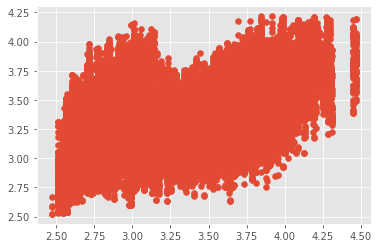

In [0]:
plt.scatter(y_test, y_predicted)
plt.show

##### Calculting Accuracy, RMSE and MAE: KNN

In [0]:
acc_KNN= round(KNN.score(X_train, y_train) * 100,2)

In [0]:
mse_KNN=sl.metrics.mean_squared_error(y_test, y_predicted)
rmse_KNN = round(math.sqrt(mse_KNN) *100,2)

In [0]:
mae_KNN = round(sl.metrics.mean_absolute_error(y_test, y_predicted) *100,2)

In [0]:
print("Accuracy: ", acc_KNN)
print("RMSE: ", rmse_KNN)
print("MAE: ", mae_KNN)

Accuracy:  43.25
RMSE:  39.81
MAE:  32.85


###<B> Using Random Forest 

In [0]:
ran_forest = RandomForestRegressor(n_estimators = 400,max_depth=16,n_jobs=4)        
ran_forest.fit(X_train,y_train)
y_predicted=ran_forest.predict(X_test)

<function matplotlib.pyplot.show>

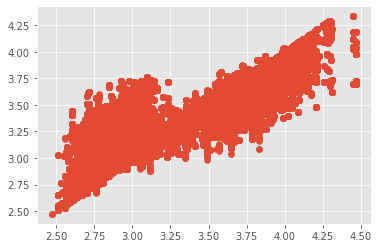

In [0]:
plt.scatter(y_test, y_predicted)
plt.show

##### Calculting Accuracy, RMSE and MAE: Random Forest

In [0]:
mse_ran_forest=sl.metrics.mean_squared_error(y_test, y_predicted)
rmse_ran_forest = round(math.sqrt(mse_ran_forest) * 100,2)

In [0]:
acc_ran_forest= round(ran_forest.score(X_train, y_train) * 100,2)

In [0]:
mae_ran_forest = round(sl.metrics.mean_absolute_error(y_test, y_predicted) *100,2)

In [0]:
print("Accuracy: ", acc_ran_forest)
print("RMSE: ", rmse_ran_forest)
print("MAE: ", mae_ran_forest)

Accuracy:  76.55
RMSE:  22.31
MAE:  14.03


###<B> Using Extra Trees

In [0]:
ex_trees = ExtraTreesRegressor(n_estimators=15,n_jobs=4) 
ex_trees.fit(X_train,y_train)
y_predicted=ex_trees.predict(X_test)

<function matplotlib.pyplot.show>

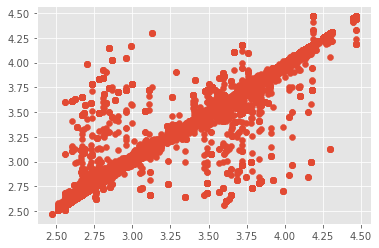

In [0]:
plt.scatter(y_test, y_predicted)
plt.show

##### Calculting Accuracy, RMSE and MAE: Extra Trees

In [0]:
acc_ex_trees= round(ex_trees.score(X_train, y_train) * 100,2)

In [0]:
mse_ex_trees=sl.metrics.mean_squared_error(y_test, y_predicted)
rmse_ex_trees =round(math.sqrt(mse_ex_trees) *100,2)

In [0]:
mae_ex_trees = round(sl.metrics.mean_absolute_error(y_test, y_predicted) *100,2)

In [0]:
print("Accuracy: ", acc_ex_trees)
print("RMSE: ", rmse_ex_trees)
print("MAE: ", mae_ex_trees)

Accuracy:  98.81
RMSE:  10.1
MAE:  1.5


###<B> Using Linear Regression

In [0]:
Linear_reg = LinearRegression()
Linear_reg.fit(X_train, y_train)
y_predicted = Linear_reg.predict(X_test)

ValueError: ignored

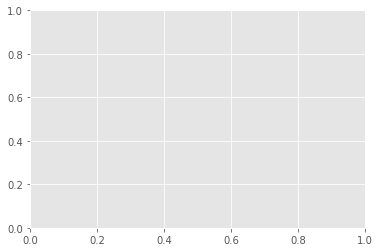

In [0]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, Linear_reg.predict(X_train), color = 'blue')
plt.show()

In [0]:
random_forest = RandomForestRegressor(n_estimators=200)
random_forest.fit(x_train, y_train)
y_predicted=random_forest.predict(x_test)
acc_rf= round(clf.score(x_train, y_train) * 100,3)
print ("Accuracy: {acc_rf} %")

ValueError: ignored